## Data cleaning

In [315]:
import pandas as pd
import numpy as np
import os

In [454]:
# Load data
data_df = pd.read_csv("house-prices.csv")
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [455]:
data_df.shape

(2430, 82)

In [548]:
test_df = pd.read_csv("house-prices-test.csv")
test_df.shape

(500, 81)

In [549]:
test_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


- Address missing values first 

In [458]:
#check the missing values counts
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [459]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            500 non-null    int64  
 1   PID              500 non-null    int64  
 2   MS SubClass      500 non-null    int64  
 3   MS Zoning        500 non-null    object 
 4   Lot Frontage     430 non-null    float64
 5   Lot Area         500 non-null    int64  
 6   Street           500 non-null    object 
 7   Alley            35 non-null     object 
 8   Lot Shape        500 non-null    object 
 9   Land Contour     500 non-null    object 
 10  Utilities        500 non-null    object 
 11  Lot Config       500 non-null    object 
 12  Land Slope       500 non-null    object 
 13  Neighborhood     500 non-null    object 
 14  Condition 1      500 non-null    object 
 15  Condition 2      500 non-null    object 
 16  Bldg Type        500 non-null    object 
 17  House Style     

There are few columns with quite a big amount of Nan values (for ex: Alley, Pool Qu, etc.). These are object types, so missing values can be replaced by 'missing', as presumably not all houses have 'Alley' in their address or fences for example. 

In [460]:
data_df["Alley"].fillna(value="no_value", inplace=True)
data_df['Fireplace Qu'].fillna(value="no_value", inplace=True)
data_df['Pool QC'].fillna(value="no_value", inplace=True)
data_df['Fence'].fillna(value="no_value", inplace=True)
data_df['Misc Feature'].fillna(value="no_value", inplace=True)
data_df["Garage Finish"].fillna(value="no_value", inplace=True)
data_df['Garage Qual'].fillna(value="no_value", inplace=True)
data_df['Garage Qual'].fillna(value="no_value", inplace=True)
data_df['Fence'].fillna(value="no_value", inplace=True)
data_df['Bsmt Qual'].fillna(value="no_value", inplace=True)
data_df['Bsmt Cond'].fillna(value="no_value", inplace=True)
data_df["Bsmt Exposure"].fillna(value="no_value", inplace=True)
data_df['BsmtFin Type 1'].fillna(value="no_value", inplace=True)
data_df['Electrical'].fillna(value="no_value", inplace=True)
data_df['Kitchen Qual'].fillna(value="no_value", inplace=True)
data_df['Mas Vnr Area'].fillna(value="0", inplace=True)
data_df['Lot Frontage'].fillna(value="0", inplace=True)
data_df['Mas Vnr Type'].fillna(value="no_value", inplace=True)
data_df['BsmtFin SF 1'].fillna(value="0", inplace=True)
data_df['BsmtFin Type 2'].fillna(value="0", inplace=True)
data_df['BsmtFin SF 2'].fillna(value="0", inplace=True)
data_df['Bsmt Unf SF'].fillna(value="0", inplace=True)
data_df['Total Bsmt SF'].fillna(value="0", inplace=True)
data_df['Bsmt Full Bath'].fillna(value="0", inplace=True)
data_df['Bsmt Half Bath'].fillna(value="0", inplace=True)
data_df['Garage Type'].fillna(value="no_value", inplace=True)
data_df['Garage Yr Blt'].fillna(value="0", inplace=True)
data_df['Garage Cond'].fillna(value="no_value", inplace=True)
data_df['Garage Cars'].fillna(value="0", inplace=True)
data_df['Garage Area'].fillna(value="0", inplace=True)

In [550]:
test_df["Alley"].fillna(value="no_value", inplace=True)
test_df['Fireplace Qu'].fillna(value="no_value", inplace=True)
test_df['Pool QC'].fillna(value="no_value", inplace=True)
test_df['Fence'].fillna(value="no_value", inplace=True)
test_df['Misc Feature'].fillna(value="no_value", inplace=True)
test_df["Garage Finish"].fillna(value="no_value", inplace=True)
test_df['Garage Qual'].fillna(value="no_value", inplace=True)
test_df['Garage Qual'].fillna(value="no_value", inplace=True)
test_df['Fence'].fillna(value="no_value", inplace=True)
test_df['Bsmt Qual'].fillna(value="no_value", inplace=True)
test_df['Bsmt Cond'].fillna(value="no_value", inplace=True)
test_df["Bsmt Exposure"].fillna(value="no_value", inplace=True)
test_df['BsmtFin Type 1'].fillna(value="no_value", inplace=True)
test_df['Electrical'].fillna(value="no_value", inplace=True)
test_df['Kitchen Qual'].fillna(value="no_value", inplace=True)
test_df['Mas Vnr Area'].fillna(value="0", inplace=True)
test_df['Lot Frontage'].fillna(value="0", inplace=True)
test_df['Mas Vnr Type'].fillna(value="no_value", inplace=True)
test_df['BsmtFin SF 1'].fillna(value="0", inplace=True)
test_df['BsmtFin Type 2'].fillna(value="0", inplace=True)
test_df['BsmtFin SF 2'].fillna(value="0", inplace=True)
test_df['Bsmt Unf SF'].fillna(value="0", inplace=True)
test_df['Total Bsmt SF'].fillna(value="0", inplace=True)
test_df['Bsmt Full Bath'].fillna(value="0", inplace=True)
test_df['Bsmt Half Bath'].fillna(value="0", inplace=True)
test_df['Garage Type'].fillna(value="no_value", inplace=True)
test_df['Garage Yr Blt'].fillna(value="0", inplace=True)
test_df['Garage Cond'].fillna(value="no_value", inplace=True)
test_df['Year Built'].fillna(value="0", inplace=True)
test_df['Year Remod/Add'].fillna(value="0", inplace=True)
test_df['Garage Yr Blt'].fillna(value="0", inplace=True)


Now let's verify if there are any columns left with any Nan values

In [462]:
# train data check
data_df.columns[data_df.isna().any()].tolist()

[]

In [463]:
#test data check
test_df.columns[test_df.isna().any()].tolist()

[]

- Dealing with inconsistent data

Let's look at the Sales price stats first

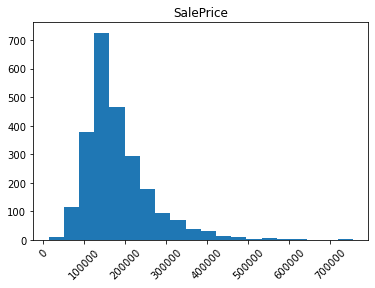

In [464]:
%matplotlib inline
import matplotlib.pyplot as plt

data_df.hist(column="SalePrice", bins=20, grid=False, xrot=45)
plt.show()

The price destribution is right skewed. Let's look further at features' statistical description.

In [465]:
data_df.describe()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,10243.557613,6.088889,5.569959,1971.167490,1984.238683,1159.845267,326.672840,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,8353.925254,1.414621,1.116442,30.207931,20.751163,393.097610,419.490754,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,880.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,1086.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,1387.750000,698.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


From the plot and data decription, it appears that most of the data is concentrated on the 10k to 30k price range. Presumably, this is the reason why mean is greater than the median value. There are also few values that are above 700, which potentially can be considered as outliers

To solve the issue with price distribution the logarithm functions can be applied to price

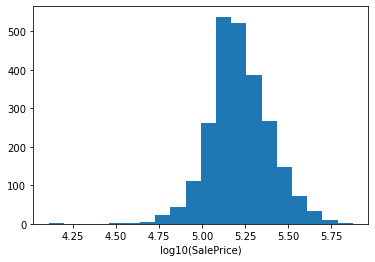

In [466]:
import numpy as np

plt.hist(np.log10(data_df.SalePrice), bins=20)
plt.xlabel("log10(SalePrice)")
plt.show()

Now it would be usefull to take at look a correlations between different columns to understand which features would be more relevant for further analysis. For this task the correlation heatmap can be ploted.

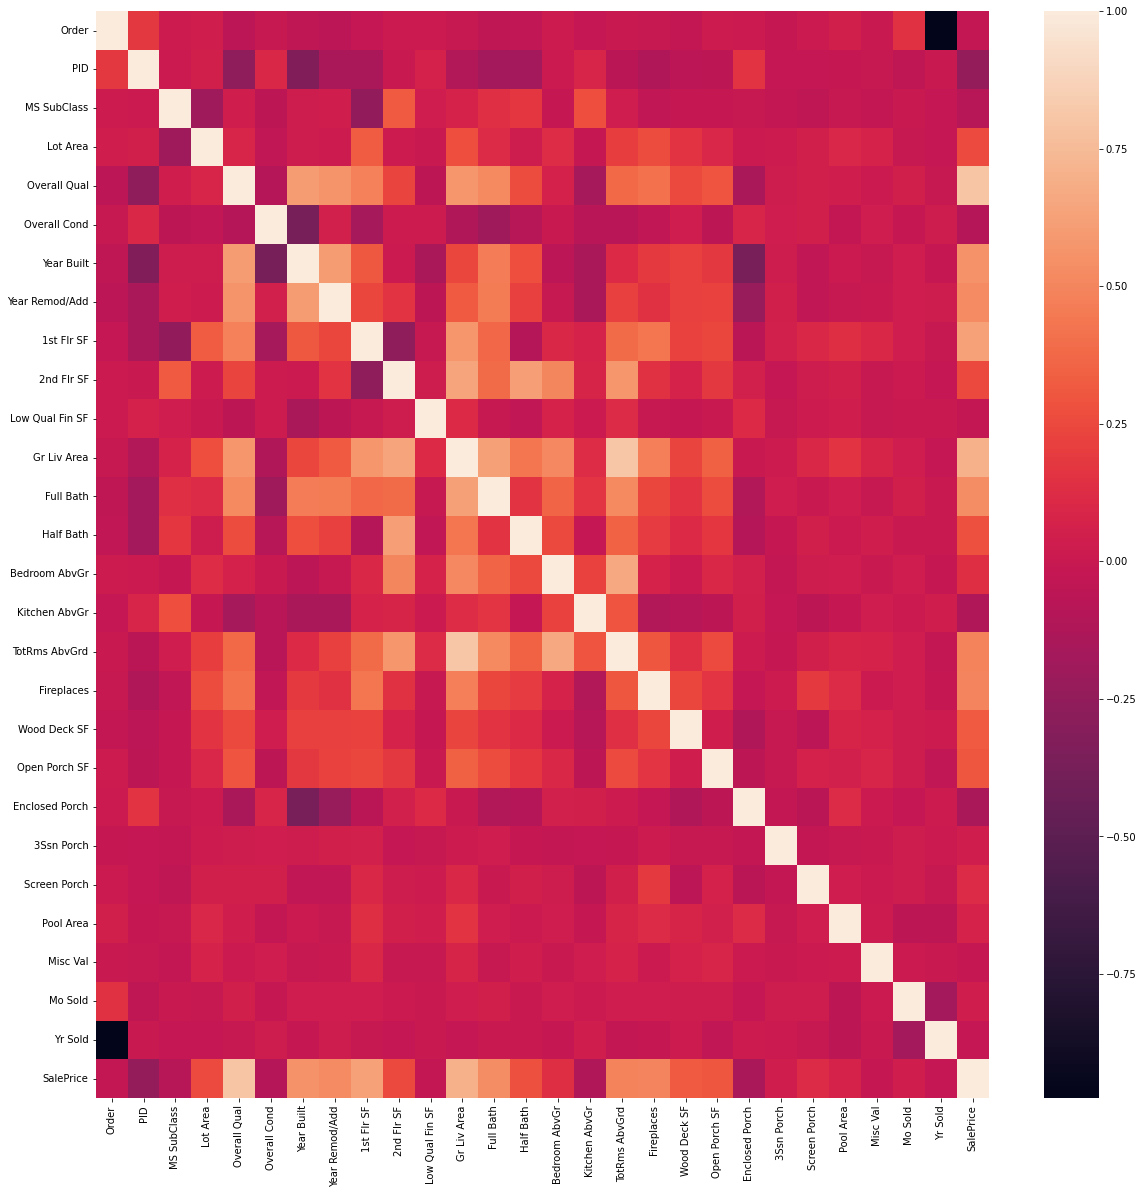

In [467]:
import seaborn as sns

#plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data_df.corr())
plt.show()

Let's look at the dependency of key varialbes of the dataset: Sales prices and the area square meters sold

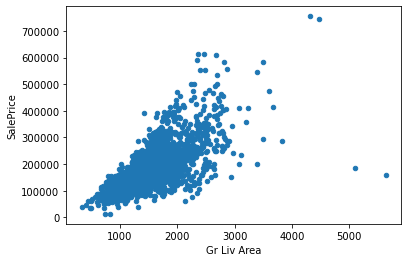

In [468]:
import pandas as pd
   
# Draw a scatter plot
data_df.plot.scatter(y = 'SalePrice', x = 'Gr Liv Area');

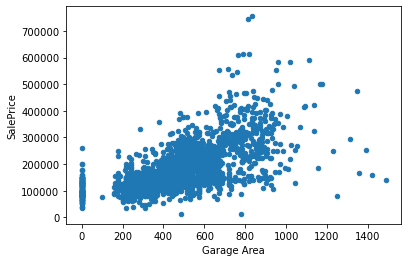

In [469]:
# Draw a scatter plot
data_df.plot.scatter(y = 'SalePrice', x = 'Garage Area');

From the above scatter plot it is visible there are few houses sold for too high prices and with quite big square feet size. Although in real life, this may happen, it seem unsual for this particular dataset. So, these records can be removed.

In [470]:
#define data to remove
unsual_d=(data_df['Gr Liv Area']>4000) | (data_df['SalePrice']>600000)
unsual_dt=test_df['Gr Liv Area']>4000

#filter it out
data_df=data_df[~unsual_d]
test_df=test_df[~unsual_dt]

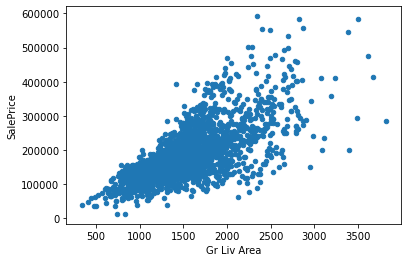

In [471]:
import pandas as pd
   
# Draw a scatter plot
data_df.plot.scatter(y = 'SalePrice', x = 'Gr Liv Area');

- Outliers removal

Although few unsual records were removed, the outlier data can be further analysed with Z-score

In [472]:
#define numerical data columns to prepare for z-score filtering                  
numerics = ['float64', 'int64']
col_num = list(data_df.select_dtypes(include=numerics))

In [473]:
#get the Z filter function to be applied on the df
zfilter_df = np.abs(data_df[col_num] - data_df[col_num].mean()) > (3 * data_df[col_num].std())
zscores_df = (data_df[col_num] - data_df[col_num].mean()) / (data_df[col_num].std())
zfilter_df2 = np.abs(zscores_df) > 3

In [474]:
#get the sum of outliers
print("Number of outliers detected per feature using z-scores:")
print(zfilter_df.sum(axis=0))
print("Total number of outliers detected:", zfilter_df.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:
Order                0
PID                  0
MS SubClass         55
Lot Area            21
Overall Qual         4
Overall Cond        49
Year Built           6
Year Remod/Add       0
1st Flr SF          20
2nd Flr SF           6
Low Qual Fin SF     24
Gr Liv Area         15
Full Bath            3
Half Bath           22
Bedroom AbvGr       21
Kitchen AbvGr      107
TotRms AbvGrd       33
Fireplaces          10
Wood Deck SF        33
Open Porch SF       43
Enclosed Porch      75
3Ssn Porch          28
Screen Porch        90
Pool Area            9
Misc Val            16
Mo Sold              0
Yr Sold              0
SalePrice           41
dtype: int64
Total number of outliers detected: 731


In [475]:
#get brief overview of outlier data
zfilter_any = zfilter_df.any(axis=1)
zfilter_any.head()

#get the shape of outlier data
outliers = data_df.loc[zfilter_any, :]
outliers.shape

(526, 82)

As per above analysis, z-score method have indified 724 records as outliers in numerical values. These can be filtered out from the df for convenience.

In [476]:
# save filtered data as new df and get the new shape
data_df = data_df.drop(outliers.index, axis=0)
data_df.shape

(1897, 82)



## Feature encoding

- Handling categorical data

First define the columns with categorical data that can be encoded

The ordinal and nominal columns are listed in the supporting documentation. 
Since there are quite many columns to encode, one-hot encoding would not be the best solution as it would create too many columns at this point. Therefore, ordinal data can be encoded with OrdinalEncoder function from sklearn, and nominal with LabelEncoder.

In [477]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#encode ordinal data columns in 3 bulks and directly transform them to dataframe with fit_transorm function

enc = OrdinalEncoder()
data_df[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond']] = enc.fit_transform(data_df[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond']])

enc = OrdinalEncoder()
data_df[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional']] = enc.fit_transform(data_df[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional']])

enc = OrdinalEncoder()
data_df[['Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Fence', 'Pool QC']] = enc.fit_transform(data_df[['Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Fence', 'Pool QC']])

Exactly same code would not work for nominal variables, so first I'd define column names and then integrate it to apply function with labelEncoder

In [478]:
#Get column list
cols = ['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']

# Encode labels of multiple columns at once with apply function
data_df[cols] = data_df[cols].apply(LabelEncoder().fit_transform)

# Print transformed data
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,5,4,0,8795,1,2,0.0,3,...,0,0.0,4.0,1,0,4,2009,9,4,236000
1,2586,535305120,0,4,75.0,10170,1,2,3.0,3,...,0,0.0,4.0,1,0,6,2006,9,4,155000
2,2289,923228250,12,5,21.0,2001,1,2,3.0,3,...,0,0.0,4.0,1,0,1,2007,9,4,75000
3,142,535152150,0,4,70.0,10552,1,2,0.0,3,...,0,0.0,4.0,1,0,4,2010,9,4,165500
5,1256,535375160,4,4,45.0,7506,1,2,3.0,3,...,0,0.0,4.0,1,0,5,2008,9,4,114000


Same encoding should be applied to test data

In [554]:
#encode ordinal data columns in 3 bulks and directly transform them to dataframe with fit_transorm function
enc = OrdinalEncoder()
test_df[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Fence', 'Pool QC']] = enc.fit_transform(test_df[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Fence', 'Pool QC']])



In [555]:
test_df.shape

(500, 81)

In [556]:
# Encode labels of multiple columns at once with apply function
test_df[cols] = test_df[cols].apply(LabelEncoder().fit_transform)

test_df.shape

(500, 81)

## Feature engineering

- Create indicator variables ex. year of construction is older than some threshold

In the previous part some of the variables were encoded with Label and Ordinal encoders. However, there are some columns that still need to be encoded. These are the Year indicators. 
However, before encoding, it would be easier to group these year values into few indicators.

First, these columns need to be converted to numeric format as otherwise boolean conditions wouldn't work.

In [557]:
#train data transformation
data_df['Year Built'] = pd.to_numeric(data_df['Year Built'], downcast="float")
data_df['Year Remod/Add'] = pd.to_numeric(data_df['Year Built'], downcast="float")
data_df['Garage Yr Blt'] = pd.to_numeric(data_df['Garage Yr Blt'], downcast="float")
data_df['Garage Cars'] = pd.to_numeric(data_df['Garage Cars'], downcast="float")
data_df['Garage Area'] = pd.to_numeric(data_df['Garage Area'], downcast="float")


#test data transformation
test_df['Year Built'] = pd.to_numeric(data_df['Year Built'], downcast="float")
test_df['Year Remod/Add'] = pd.to_numeric(data_df['Year Built'], downcast="float")
test_df['Garage Yr Blt'] = pd.to_numeric(data_df['Garage Yr Blt'], downcast="float")
test_df['Garage Cars'] = pd.to_numeric(test_df['Garage Cars'], downcast="float")
test_df['Garage Area'] = pd.to_numeric(test_df['Garage Area'], downcast="float")

Now let's check columns' descriptions and form the groups based on min, max and percentile values

In [558]:
data_df[['Year Built', 'Year Remod/Add','Garage Yr Blt']].describe()

,Year Built,Year Remod/Add,Garage Yr Blt
count,1897.000000,1897.000000,1897.000000
mean,1974.346924,1974.346924,1898.137085
std,28.846743,28.846743,393.941711
min,1885.000000,1885.000000,0.000000
25%,1956.000000,1956.000000,1959.000000
50%,1976.000000,1976.000000,1979.000000
75%,2002.000000,2002.000000,2002.000000
max,2009.000000,2009.000000,2207.000000


In [559]:
#define ranges and values assigned to 'Year Built'
filters = [
   (data_df['Year Built'].between(1883, 1956)) , (data_df['Year Built'].between(1956, 1980)),
   (data_df['Year Built'].between(1980, 2010)) 
]
values = ["very_old", "old_mid_cent", "modern"]

# apply filter with select value and check the result
data_df['Year Built1'] = np.select(filters, values)

In [560]:
#define ranges and values assigned to each one of them 'Year Remod/Add'
filters1 = [
   (data_df['Year Remod/Add'].between(1883, 1956)) , (data_df['Year Remod/Add'].between(1956, 1980)),
   (data_df['Year Remod/Add'].between(1980, 2010)) 
]
values1 = ["old_remod", "need_renovation", "recently_renovated"]

# apply filter with select value and check the result
data_df['Year Remod/Add1'] = np.select(filters1, values1)

In [561]:
#define ranges and values assigned to each one of them 'Year Remod/Add'
filters2 = [
   (data_df['Garage Yr Blt'].between(1883, 1960)) , (data_df['Garage Yr Blt'].between(1960, 2000)),
   (data_df['Garage Yr Blt'].between(2000, 2010)) 
]
values2 = ["very_old_garage", "old_garage", "relatively_new"]

# apply filter with select value and check the result
data_df['Garage Yr Blt1'] = np.select(filters2, values2)

In [562]:
#check the new columns
data_df[['Year Built','Year Built1','Year Remod/Add','Year Remod/Add1','Garage Yr Blt','Garage Yr Blt1']].head()

,Year Built,Year Built1,Year Remod/Add,Year Remod/Add1,Garage Yr Blt,Garage Yr Blt1
0,2000.0,modern,2000.0,recently_renovated,2000.0,old_garage
1,1951.0,very_old,1951.0,old_remod,1951.0,very_old_garage
2,1970.0,old_mid_cent,1970.0,need_renovation,1970.0,old_garage
3,1959.0,old_mid_cent,1959.0,need_renovation,1959.0,very_old_garage
5,1925.0,very_old,1925.0,old_remod,1932.0,very_old_garage


Same transformations should be done in the test set

In [563]:
#define ranges and values assigned to 'Year Built'
filters = [
   (test_df['Year Built'].between(1883, 1956)) , (test_df['Year Built'].between(1956, 1980)),
   (test_df['Year Built'].between(1980, 2010)) 
]
values = ["very_old", "old_mid_cent", "modern"]

# apply filter with select value and check the result
test_df['Year Built1'] = np.select(filters, values)

#define ranges and values assigned to each one of them 'Year Remod/Add'
filters1 = [
   (test_df['Year Remod/Add'].between(1883, 1956)) , (test_df['Year Remod/Add'].between(1956, 1980)),
   (test_df['Year Remod/Add'].between(1980, 2010)) 
]
values1 = ["old_remod", "need_renovation", "recently_renovated"]

# apply filter with select value and check the result
test_df['Year Remod/Add1'] = np.select(filters1, values1)

#define ranges and values assigned to each one of them 'Year Remod/Add'
filters2 = [
  (test_df['Garage Yr Blt'].between(1883, 1960)) , (test_df['Garage Yr Blt'].between(1960, 2000)),
   (test_df['Garage Yr Blt'].between(2000, 2010)) 
]
values2 = ["very_old_garage", "old_garage", "relatively_new"]

# apply filter with select value and check the result
test_df['Garage Yr Blt1'] = np.select(filters2, values2)

In [564]:
# check the result
data_df.select_dtypes('object').head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built1,Year Remod/Add1,Garage Yr Blt1
0,0,0.0,300.0,0.0,652.0,952.0,0.0,0.0,modern,recently_renovated,old_garage
1,75.0,522.0,0.0,0.0,216.0,216.0,0.0,0.0,very_old,old_remod,very_old_garage
2,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,old_mid_cent,need_renovation,old_garage
3,70.0,0.0,1018.0,0.0,380.0,1398.0,0.0,1.0,old_mid_cent,need_renovation,very_old_garage
5,45.0,0.0,0.0,0.0,747.0,747.0,0.0,0.0,very_old,old_remod,very_old_garage


In [566]:
test_df.shape

(500, 84)

- Transformations ex. log-transforms, polynomials

For this part of excercise a polynomial to model  can be used to model relationship between Price and Living area variables as these two features would be good for further simple model fitting 

In [488]:
data_dfx=data_df

First, xy variables should be defined and then, the data can be plotted

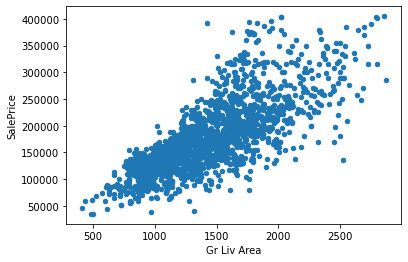

In [489]:
# Extract x, y data
x = data_dfx['Gr Liv Area'].values  
y = data_dfx['SalePrice'].values  

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter('Gr Liv Area','SalePrice')
plt.show()

Create features through PolynomialFeatures functions and then, the data can be transofrmed

In [490]:
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis]  # (57,) -> (57,1)
)

#get the shape of the new data
print("Shape:", X2.shape)

Shape: (1897, 3)


Compute the number of new features manually with numpy function

In [491]:
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
Xp = pf_obj.transform((x[:, np.newaxis]))

In [492]:
Xp = np.c_[x, x ** 2]

Now the fitting of linear regression could be tested to see how the approximate prediction would look like for simple model

In [493]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(Xp, y)

LinearRegression()

In [494]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])
X_values2 = np.c_[x_values, x_values ** 2]

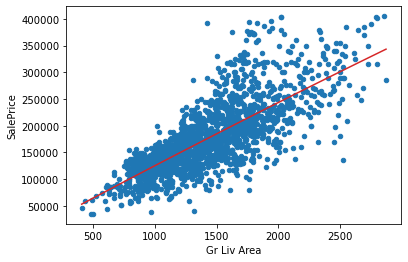

In [495]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter('Gr Liv Area','SalePrice')
plt.plot(x_values, y_values, color="C3")
plt.show()

### Model fitting

- Get the baseline model by computing the median for further model comparisons

In [567]:
import numpy as np

# Extract the target
price_b = data_df.SalePrice.values

# Compute baseline
pred_baseline = np.mean(price_b)  
pred_baseline

174342.23985239852

The prediction of the baseline is 174712.7 in price for the house.
Now the Mean Absolute Error can be calculated as a difference between the baselines value (predicted) and the actual Sales Price value

We can now calculate the error.

In [568]:
# define Mean absolute error 
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [569]:
# compare the baseline with actual data
mae_baseline = MAE(price_b, pred_baseline)
mae_baseline

50753.28151460745

Let's take a closer look at the features that are correlated the most to the SalesPrice. Based on these numbers, the features for simple and intermidate model can be chosen

In [570]:
corr = data_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(15))

SalePrice         1.000000
Overall Qual      0.819246
Gr Liv Area       0.755445
Garage Cars       0.691576
Garage Area       0.657015
Year Remod/Add    0.640317
Year Built        0.640317
Full Bath         0.636361
1st Flr SF        0.626270
TotRms AbvGrd     0.558747
Foundation        0.489467
Fireplaces        0.466176
Open Porch SF     0.397142
Lot Area          0.332905
Wood Deck SF      0.303134
Name: SalePrice, dtype: float64


Since Overall Quality has a high correlations with Sales Price, let's get a baseline model that can be used for price prediction

In [571]:
from sklearn.linear_model import LinearRegression

qual_base=data_df[['Overall Qual']]
price_base= data_df[['SalePrice']]
lr =LinearRegression()
lr.fit(qual_base,price_base)
lr.score(qual_base,price_base)

0.6711638485050184

Now that the baselines is calculated, Mean Absolute Error functions can be defined for further comparisons

Alternative way to generate the baseline through RSS measure

- Simple linear regression

For the simple model building I would take two columns that have different correlation level to the SalesPrice, and then create the input matrix X and the output vector y. 

Assuming that Year Built and Overall quality have the highest impacts on price

In [572]:
#get features
df_simple=data_df[['Gr Liv Area','Overall Qual','SalePrice']]

In [573]:
# Extract input matrix X
X = df_simple.drop('SalePrice', axis=1).values

# Extract target vector y
Y = df_simple.SalePrice.values

In [574]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
w, rss, _, _ = lstsq(X, Y)
print("w:", w)
print("RSS:", rss)

w: [   51.26596028 25424.74711841]
RSS: 1955047671461.0857


Adding the intercept term

In [575]:
import numpy as np

# Add a column of ones
X1 = np.c_[np.ones(X.shape[0]),  # Vector of ones of shape (n,)
           X]                    # X matrix of shape (n,p)

X1[:5, :]

w, rss, _, _ = lstsq(X1, Y)

print("w:", w)
print("RSS:", rss)

w: [-29420.83482686     63.38176728  27915.93845566]
RSS: 1837526109166.0522


In [576]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Fit the model
lr.fit(X1, Y)

# Print coefficients
print("Slope coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Slope coefficients: [    0.            63.38176728 27915.93845566]
Intercept: -29420.83482685566


Next step is to evaluate the model and get the R^2 coefficient of determination

In [577]:
model = LinearRegression().fit(X1, Y)
r_sq = model.score(X1, Y)
('coefficient of determination:', r_sq)

('coefficient of determination:', 0.7736633258464268)

the R^2 for simple model is nearly 69%, which isn't bad. Hence, the model performs better than baseline

In [578]:
# Compute predictions for Simple model
ys_pred = model.predict(X1)
ys_pred[:3]

array([253148.12444304, 182069.20246731,  95623.93195805])

Perform the same steps for test data

In [579]:
#test_df['Year Built'].fillna(value="0", inplace=True)
test_dfs=test_df[['Gr Liv Area','Overall Qual']]
X_te = test_dfs.values

# Add a column of ones
X1_te = np.c_[np.ones(X_te.shape[0]),  # Vector of ones of shape (n,)
           X_te]                    # X matrix of shape (n,p)

X1_te[:5, :]

y_te = model.predict(X1_te)  # create y-labels through the learned model

y_te[:10]

array([208436.01765725, 117074.93015079, 262936.87745561, 126201.90463962,
       101074.76394444, 184224.18255495,  49010.37215376, 144420.4327009 ,
       147244.65137775, 102722.68989381])

Save test data prediction to CSV file

In [580]:
test_dfx=test_df
test_dfx["SalePrice"] = y_te
pred_simple = test_dfx[["PID","SalePrice"]]

In [581]:
pred_simple.shape

(500, 2)

In [582]:
pred_simple.to_csv("predictions-simple-model.csv", index=False)

- Intermediate model

For this part all of the columns from the above list of correlation numbers would be taken for model computation

In [583]:
df_int=data_df[['SalePrice','Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Full Bath','Year Built','Year Remod/Add','1st Flr SF','TotRms AbvGrd','Fireplaces','Open Porch SF']]

In [584]:
# Extract input matrix X
X2 = df_int.drop('SalePrice', axis=1).values
# Extract target vector y
Y2 = df_int.SalePrice.values

In [585]:
# get the vector of coefficients  and RSS values
w2, rss2, _, _ = lstsq(X2, Y2)
print("w:", w2)
print("RSS:", rss2)

w: [ 2.04485453e+04  4.40164088e+01  8.10104368e+03  3.35239162e+01
  2.68325201e+03 -1.09066252e+01 -1.09066252e+01  3.39858078e+01
 -7.88664839e+02  4.99782756e+03  4.99050252e+01]
RSS: []


In [586]:
#get the linear regression model
model = LinearRegression().fit(X2, Y2)

In [587]:
# Create a linear regression object
lr = LinearRegression()
# Fit the model
lr.fit(X2, Y2)
# Print coefficients
print("Slope coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Slope coefficients: [16885.19594812    48.74265417  4095.59436151    33.92547709
 -4761.23006414   186.54403896   186.54403896    34.05978671
   196.5018754   5748.97332057    33.80939058]
Intercept: -759475.079950347


Next step is to evaluate the model and get the R^2 coefficient of determination

In [588]:
r_sq = model.score(X2, Y2)
('coefficient of determination:', r_sq)

('coefficient of determination:', 0.8447540559013402)

The R^2 score has increased with adding more columns. Hence, the model performs better than baseline and simple model

In [589]:
# Compute predictions for intermidiate model
yi_pred = np.matmul(X2, w2)
print(yi_pred)

[232747.55713582 195439.43032681  80187.30366212 ... 132391.81967006
 138547.94641419 139624.22359699]


Same computations for test data 

In [590]:
#test_df['Year Built'].fillna(value="0", inplace=True)
test_dfi=test_df[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Full Bath','Year Built','Year Remod/Add','1st Flr SF','TotRms AbvGrd','Fireplaces','Open Porch SF']]
X2_te = test_dfi.values

# Compute predictions for intermidiate model
yit_pred = np.matmul(X2_te, w2)
yit_pred[:10]

array([195897.64084557, 117601.67365453, 261790.22366305, 122433.85399797,
                   nan, 174181.38543869,  41162.31376181,             nan,
       180797.65537818, 107849.72004684])

Save the test prediction for CSV file

In [591]:
test_df1=test_df
test_df1["SalePrice"] = yit_pred
pred_int = test_df1[["PID","SalePrice"]]
pred_int.to_csv("predictions-intermediate-model.csv", index=False)

In [592]:
pred_int.shape

(500, 2)

In [593]:
pred_int.head()

,PID,SalePrice
0,909279080,195897.640846
1,907126050,117601.673655
2,528144030,261790.223663
3,535452060,122433.853998
4,911202100,NaN


- Complex model

For this part, given that all features should be involved, I'd fit linear model to SGDRegressor using the gradient descent algorithm to optimze Huber and Squared loss functions

This time, we will track the value of the root mean squared error (RMSE) function at each iteration. If our implementation is correct, this value should decrease after each step.

Before moving to the model buidling, few columns still need to be encoded. So, for this part I will use One-hot encoding to transforma 3 last columns containing categorical values

In [594]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["Year Built1", "Year Remod/Add1","Garage Yr Blt1"])
encoded_df.shape

(1897, 92)

In [595]:
# Create input matrices and output vectors
X3 = encoded_df.drop('SalePrice', axis=1).values
y3 = encoded_df.SalePrice.values

In [596]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Fit the model
lr.fit(X3, y3)

# Print coefficients
print("Slope coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Slope coefficients: [-7.90417578e+00  5.35994457e-06 -8.21721310e+02 -1.86005259e+03
  5.34998966e+01  9.07303209e-01  2.02588511e+04  2.01696774e+03
 -1.51169079e+03 -2.11103003e+03  2.42829886e+04  1.91050680e+02
  1.29839936e+03  8.54653117e+01  2.56314849e+02  5.25210721e+03
  7.59276287e+02  5.08259645e+02  9.94390995e+03  5.19979084e+03
  1.51737720e+02  1.51737726e+02  1.63266641e+03 -3.18845396e+03
 -1.00386398e+03  3.68246058e+02  2.32554434e+03  2.36104597e+01
 -7.49357900e+03  9.72122662e+02 -4.88782771e+02 -2.48363842e+03
  3.06527097e+03 -1.58426631e+03 -1.18253579e+02  1.67307635e+01
 -1.83022628e+03 -4.77890325e-01  7.62260601e-03  1.62604768e+01
  5.40430064e+02 -8.93662996e+02 -8.37507590e+02  5.31693015e+02
  6.97745507e+01  7.04703090e+01 -1.56259313e+02 -1.60144726e+01
  4.08236308e+03  3.81649835e+02 -2.64226641e+03 -7.59388784e+02
 -3.12763195e+03  7.90805643e-09 -6.07782746e+03  1.22094023e+03
  4.91624158e+03  2.79192406e+03 -7.16733723e+02  6.26642709e+02
 -5.9

In [597]:
import numpy as np

# Implement RMSE
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [598]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression using OLS
lr = LinearRegression()  # Create object
lr.fit(X3, y3)  # Fit it to train data

# Evaluate model
yc_pred = lr.predict(X3)  # Train data
lr_rmse = rmse(y3, yc_pred)

print("Linear regression (OLS) - RMSE: {:.2f}".format(lr_rmse))

Linear regression (OLS) - RMSE: 19208.37


In [599]:
test_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Year Built1,Year Remod/Add1,Garage Yr Blt1,SalePrice
0,2217,909279080,4,3,0,11275,1,2,0.0,1,...,2,0,3,2007,7,4,modern,recently_renovated,old_garage,195897.640846
1,837,907126050,0,3,65.0,9757,1,2,3.0,2,...,2,0,10,2009,7,4,very_old,old_remod,very_old_garage,117601.673655
2,2397,528144030,5,3,86.0,11065,1,2,0.0,3,...,2,0,10,2006,5,5,old_mid_cent,need_renovation,old_garage,261790.223663
3,1963,535452060,0,3,70.0,7000,1,2,3.0,3,...,2,0,4,2007,7,3,old_mid_cent,need_renovation,very_old_garage,122433.853998
4,306,911202100,4,0,66.0,8712,1,1,3.0,1,...,2,0,1,2010,7,0,0,0,0,NaN


In [600]:
# One-hot encoding
encoded_test = pd.get_dummies(test_df, columns=["Year Built1", "Year Remod/Add1","Garage Yr Blt1"])

# drop two columns that are not present in the training data to match the column total number
encoded_test.drop(['Year Built1_0', 'Year Remod/Add1_0'], axis=1, inplace=True)
encoded_test.shape

(500, 92)

Before fitting the model, few columns again need to have Nan values replaced

In [601]:
encoded_test['Year Built'].fillna(value="0", inplace=True)
encoded_test['Year Remod/Add'].fillna(value="0", inplace=True)
encoded_test['Garage Yr Blt'].fillna(value="0", inplace=True)
encoded_test['SalePrice'].fillna(value="0", inplace=True)

#verify the result
encoded_test.columns[encoded_test.isna().any()].tolist()

[]

Now that the column number is matching, X values can be defined and prediction computed

In [602]:
X3_te = encoded_test.drop('SalePrice', axis=1).values

# Compute predictions for intermidiate model
yc_pred_t = lr.predict(X3_te)
yc_pred_t[:10]

array([ 217289.60061121,  140938.8448082 ,  283263.94965217,
        126614.82171819, -471596.45266063,  172058.39826193,
         41373.39254929, -435809.42518028,  198496.05209988,
        108890.91447637])

In [603]:
test_dfc=test_df
test_dfc["SalePrice"] = yc_pred_t
pred_comp = test_dfc[["PID","SalePrice"]]
pred_comp.to_csv("predictions-complex-model.csv", index=False)

In [604]:
pred_comp.shape

(500, 2)

### Regularization

For this part the Regularization will be applied to Complex model through L2 Ridge regression method. However, the XY values would need to be difned again as logarithmic scaling is applied, and the data is split into Training and Validation sets.


In [395]:
#get the copy of data used for comple model built
df_prep=encoded_df

In [396]:
from sklearn.model_selection import train_test_split

# Create X, y
X4 = df_prep.drop("SalePrice", axis=1).values
y4 = np.log10(df_prep.SalePrice).values

# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X4, y4, test_size=0.5, random_state=0)

print("Train:", X_tr.shape, y_tr.shape)
print("Validation:", X_val.shape, y_val.shape)

Train: (948, 91) (948,)
Validation: (949, 91) (949,)


In [397]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Try with a linear regression
lr = LinearRegression()
lr.fit(X_tr_rescaled, y_tr)

print("Train MSE: {:.4f}".format(MSE(y_tr, lr.predict(X_tr_rescaled))))
print("Validation MSE: {:.4f}".format(MSE(y_val, lr.predict(X_val_rescaled))))

Train MSE: 0.0020
Validation MSE: 0.0030


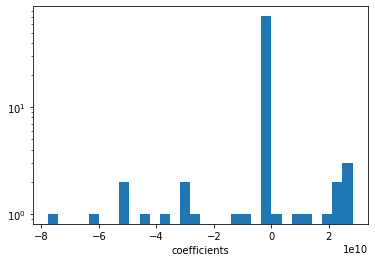

In [399]:
plt.hist(lr.coef_, bins=30)
plt.xlabel("coefficients")
plt.yscale('log')
plt.show()

the Coefficient seem to be high one point, so this can solved with Rdge functions

In [400]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

In [401]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.002009,12294.783058,0.002683,13787.608952
1,0.000176,0.002009,12294.775043,0.002682,13787.106394
2,0.000309,0.002009,12294.760980,0.002682,13786.226077
3,0.000543,0.002009,12294.736332,0.002681,13784.686394
4,0.000954,0.002009,12294.693225,0.002680,13782.000183


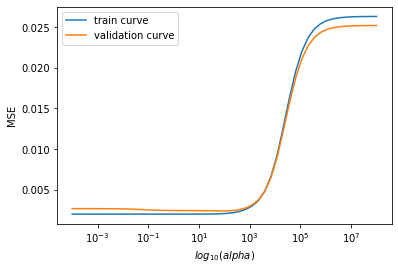

In [402]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mse"], label="validation curve"
)
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

The optimal range of alpha values seems to be around 10^3, the model starts overfitting when alpha is smaller than 10^2 and The models starts underfitting when alpha is larger than 10^4

Now let's calculate the largest coeficient and intercept value for predicition

In [403]:
# Fit a model with a very strong regularization
strong_ridge = Ridge(alpha=10 ** 10)
strong_ridge.fit(X_tr_rescaled, y_tr)

print("Largest coefficient: {:.1e}".format(np.max(np.abs(strong_ridge.coef_))))
print("Intercept: {:.2f}".format(strong_ridge.intercept_))

Largest coefficient: 1.3e-08
Intercept: 5.21


In [404]:
print("Mean target value: {:.2f}".format(np.mean(y_tr)))

Mean target value: 5.21


The interept and mean values are the same, which is a good sign

In [405]:
# Get entry with the best validation MSE
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]

# Print the details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae))

Best alpha: 7.5e+01
Validation MSE: 0.0024
Validation MAE: 13,096$


As we can see from the results above, the predictions from this model are, on average, 13,09 dollars away from the true price. 

### Communicating the results

Since the predictions are already calculated for each model, now the Mean Abosolute Error can computed for each and further ploted for comparison.

In [406]:
# define Mean absolute error 
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [407]:
# compare the baseline with actual data
mae_baseline = MAE(price_b, pred_baseline)
mae_baseline

50753.28151460745

In [408]:
# Compute Mean Absolute Error for Simple Model
mae_lrs = MAE(Y, ys_pred)
mae_lrs

23687.95332341489

In [409]:
# Compute Mean Absolute Error for intermidiate model
mae_lri = MAE(Y2, yi_pred)
mae_lri

20179.435181399152

In [410]:
# Compute Mean Absolute Error for complex model
mae_lrc = MAE(y3, yc_pred)
mae_lrc

13937.04959021207

We can now calculate the error and finally plot the comparisons fo different models

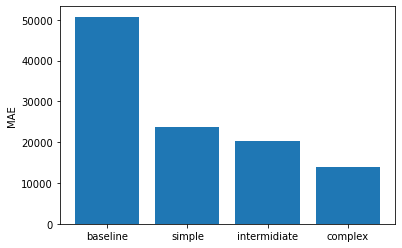

In [411]:
# (C) Final comparison

# Bar plot
mae_values = [mae_baseline, mae_lrs , mae_lri , mae_lrc]
titles = ["baseline", "simple", "intermidiate", "complex"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()

In [412]:
# Load data
predic = pd.read_csv("predictions-example.csv")
predic.head()

,PID,SalePrice
0,909279080,0
1,907126050,0
2,528144030,0
3,535452060,0
4,911202100,0


As expected, the more complex is model the less is the Mean Absolute Error score